In [443]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import tensorflow as tf
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
import re
import string
import nltk
sns.despine()
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

<Figure size 432x288 with 0 Axes>

**1. Data Exploration & Preprocessing**

In [444]:
!pip install openpyxl

In [445]:
# Baca dan tampilkan data
df = pd.read_excel(r'../input/cyberbullying-bahasa-indonesia/DATASET CYBERBULLYING INSTAGRAM - FINAL.xlsx')
df

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
...,...,...,...,...,...,...,...,...
645,646,@_sigesrek,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
646,647,@safronlux.id,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
647,648,@rikzikmuktyana,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
648,649,@antoniusbennys,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN


In [446]:
df = df.drop(['No.', 'Nama Instagram', 'Tanggal Posting', 'Unnamed: 6', 'Unnamed: 7'], axis=1)
df

,Komentar,Kategori,Nama Akun IG Artis/Selebgram
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,@isyanasarasvati
1,"""makan nasi padang aja begini badannya""",Non-bullying,@isyanasarasvati
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,@isyanasarasvati
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,@isyanasarasvati
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,@isyanasarasvati
...,...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,@isyanasarasvati
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,@isyanasarasvati
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,@isyanasarasvati
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,@isyanasarasvati


In [447]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Komentar                       650 non-null    object
 1   Kategori                       650 non-null    object
 2   Nama Akun IG  Artis/Selebgram  650 non-null    object
dtypes: object(3)
memory usage: 15.4+ KB


In [448]:
# Checking for null values
df.isnull().values.any()

False

In [449]:
# Separating based on different sentiments
df_cb = analysis_df[df["Kategori"]=="Non-bullying"]
df_noncb = analysis_df[df["Kategori"]=="Bullying"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [450]:
# Melihat jumlah masing-masing tipe
df['Kategori'].value_counts()

Non-bullying    325
Bullying        325
Name: Kategori, dtype: int64

<AxesSubplot:xlabel='Kategori', ylabel='count'>

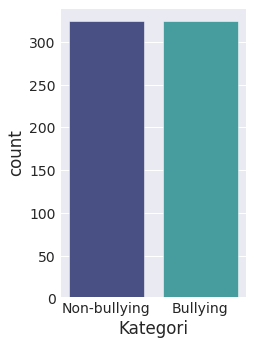

In [451]:
# Distribusi Target
plt.figure(figsize=(3,5))
sns.countplot(df.Kategori,palette="mako")

count    325.000000
mean      11.304615
std        4.951881
min        5.000000
25%        7.000000
50%       10.000000
75%       14.000000
max       31.000000
Name: Length, dtype: float64

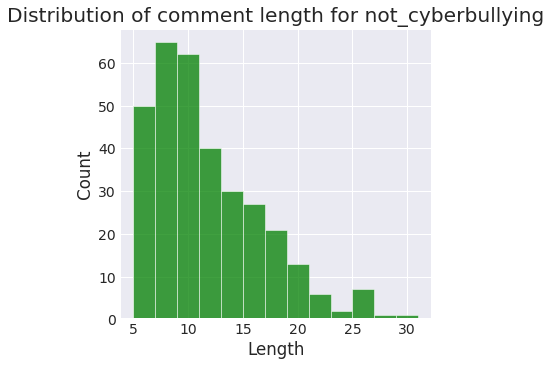

In [452]:
# Melihat statistical description serta histogram panjang comments Non-CB
df["Length"] = df.Komentar.str.split().apply(len)
plt.figure(figsize=(5,5))
sns.histplot(df[df["Kategori"]=="Non-bullying"]['Length'],color="g")
plt.title("Distribution of comment length for not_cyberbullying")
display(df.Length[df["Kategori"]=="Non-bullying"].describe())

count    325.000000
mean       9.452308
std        4.266041
min        3.000000
25%        6.000000
50%        8.000000
75%       11.000000
max       25.000000
Name: Length, dtype: float64

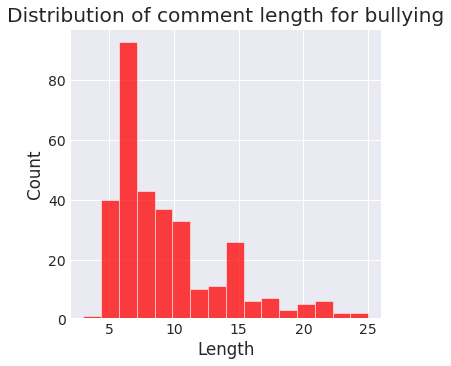

In [453]:
# Melihat statistical description serta histogram panjang comments CB
df["Length"] = df.Komentar.str.split().apply(len)
plt.figure(figsize=(5,5))
sns.histplot(df[df["Kategori"]=="Bullying"]['Length'],color="r")
plt.title("Distribution of comment length for bullying")
display(df.Length[df["Kategori"]=="Bullying"].describe())

In [454]:
# variabel untuk kolom Tweet
comments = df.Komentar
print(comments.head())

0          "Kaka tidur yaa, udah pagi, gaboleh capek2"
1              "makan nasi padang aja begini badannya"
2    "yang aku suka dari dia adalah selalu cukur je...
3    "Hai kak Isyana aku ngefans banget sama kak Is...
4    "Manusia apa bidadari sih herann deh cantik te...
Name: Komentar, dtype: object


In [455]:
# Case Folding
# gunakan fungsi series.str.lower() pada Pandas
comments = comments.str.lower()

print(comments.head())

0          "kaka tidur yaa, udah pagi, gaboleh capek2"
1              "makan nasi padang aja begini badannya"
2    "yang aku suka dari dia adalah selalu cukur je...
3    "hai kak isyana aku ngefans banget sama kak is...
4    "manusia apa bidadari sih herann deh cantik te...
Name: Komentar, dtype: object


In [456]:
def remove_special_signs(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
comments = comments.apply(remove_special_signs)
print(comments.head())

0          "kaka tidur yaa, udah pagi, gaboleh capek2"
1              "makan nasi padang aja begini badannya"
2    "yang aku suka dari dia adalah selalu cukur je...
3    "hai kak isyana aku ngefans banget sama kak is...
4    "manusia apa bidadari sih herann deh cantik te...
Name: Komentar, dtype: object


In [457]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

comments = comments.apply(remove_number)
comments.head(5)

0           "kaka tidur yaa, udah pagi, gaboleh capek"
1              "makan nasi padang aja begini badannya"
2    "yang aku suka dari dia adalah selalu cukur je...
3    "hai kak isyana aku ngefans banget sama kak is...
4    "manusia apa bidadari sih herann deh cantik te...
Name: Komentar, dtype: object

In [458]:
# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

comments = comments.apply(remove_punctuation)
comments.head(5)

0               kaka tidur yaa udah pagi gaboleh capek
1                makan nasi padang aja begini badannya
2    yang aku suka dari dia adalah selalu cukur jem...
3    hai kak isyana aku ngefans banget sama kak isy...
4    manusia apa bidadari sih herann deh cantik terus 
Name: Komentar, dtype: object

In [459]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

comments = comments.apply(remove_whitespace_LT)
print(comments.head())

0               kaka tidur yaa udah pagi gaboleh capek
1                makan nasi padang aja begini badannya
2    yang aku suka dari dia adalah selalu cukur jem...
3    hai kak isyana aku ngefans banget sama kak isy...
4     manusia apa bidadari sih herann deh cantik terus
Name: Komentar, dtype: object


In [460]:
# remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

comments = comments.apply(remove_whitespace_multiple)
print(comments.head())

0               kaka tidur yaa udah pagi gaboleh capek
1                makan nasi padang aja begini badannya
2    yang aku suka dari dia adalah selalu cukur jem...
3    hai kak isyana aku ngefans banget sama kak isy...
4     manusia apa bidadari sih herann deh cantik terus
Name: Komentar, dtype: object


In [461]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

comments = comments.apply(remove_singl_char)
print(comments.head())

0               kaka tidur yaa udah pagi gaboleh capek
1                makan nasi padang aja begini badannya
2    yang aku suka dari dia adalah selalu cukur jem...
3    hai kak isyana aku ngefans banget sama kak isy...
4     manusia apa bidadari sih herann deh cantik terus
Name: Komentar, dtype: object


In [462]:
# Filtering - Stopword Removal

# Get Indonesian stopwords
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 
                       'nyg', 'hehe', 'pen', 'nan', 'loh',
                       '&amp', 'yah'])

# read txt stopword using pandas
csv_stopword = pd.read_csv("../input/cyberbullying-bahasa-indonesia/stopwordsID.csv")

# convert stopword string to list & append additional stopword
list_stopwords.extend(csv_stopword)

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

comments = comments.apply(stopwords_removal) 


print(comments.head())

0    [k, a, k, a,  , t, i, u, r,  , y, a, a,  , u, ...
1    [m, a, k, a, n,  , n, a, s, i,  , p, a, a, n, ...
2    [y, a, n, g,  , a, k, u,  , s, u, k, a,  , a, ...
3    [h, a, i,  , k, a, k,  , i, s, y, a, n, a,  , ...
4    [m, a, n, u, s, i, a,  , a, p, a,  , b, i, a, ...
Name: Komentar, dtype: object


In [463]:
# Normalisasi
normalized_word = pd.read_csv("../input/cyberbullying-bahasa-indonesia/kamus_singkatan.csv")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

comments = comments.apply(normalized_term)

comments.head(10)

0    [k, a, k, a,  , t, i, u, r,  , y, a, a,  , u, ...
1    [m, a, k, a, n,  , n, a, s, i,  , p, a, a, n, ...
2    [y, a, n, g,  , a, k, u,  , s, u, k, a,  , a, ...
3    [h, a, i,  , k, a, k,  , i, s, y, a, n, a,  , ...
4    [m, a, n, u, s, i, a,  , a, p, a,  , b, i, a, ...
5    [k, i, n, a, n, t, i, i,  , i, s, y, a, n,  , ...
6    [g, e, m, e, s, n, y, a,  , i, s, y, a, n,  , ...
7    [m, a, k, i, n,  , j, e, l, e, k,  , a, j, a, ...
8    [k, o, k,  , a, n, a, k, n, y, a,  , k, a, y, ...
9    [m, u, k, a,  , a, n, a, k,  , n, y, a,  , k, ...
Name: Komentar, dtype: object

In [464]:
!pip install Sastrawi
!pip install Swifter

In [465]:
# import Sastrawi package
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# import swifter


# create stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# stemmed
#def stemmed_wrapper(term):
#    return stemmer.stem(term)

#term_dict = {}

#for document in comments:
#    for term in document:
#        if term not in term_dict:
#            term_dict[term] = ' '
            
#print(len(term_dict))

#for term in term_dict:
#    term_dict[term] = stemmed_wrapper(term)
#    print(term,":" ,term_dict[term])
    
#print(term_dict)

# apply stemmed term to dataframe
#def get_stemmed_term(document):
#    return [term_dict[term] for term in document]

#comments = comments.swifter.apply(get_stemmed_term)
#print(comments)

In [466]:
# convert the categorical values to numeric using the factorize() method. This returns an array of numeric values and an Index of categories.
# Inisialisasi variabel target
y = df["Kategori"]
#mengubah y menjadi integer
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)
print(y)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [467]:
# Menghitung jumlah value integer sentimen
df["Kategori"].value_counts()

Non-bullying    325
Bullying        325
Name: Kategori, dtype: int64

In [468]:
# Tokenisasi
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)

In [469]:
# Menampilkan indeks dari setiap kata dalam tweet
print(tokenizer.index_word)

{1: 'a', 2: ' ', 3: 'n', 4: 'i', 5: 'e', 6: 'k', 7: 'u', 8: 'g', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'r', 14: 'h', 15: 'b', 16: 'y', 17: 'o', 18: 'p', 19: 'j', 20: 'c', 21: 'w', 22: 'f', 23: 'v', 24: 'z', 25: 'x', 26: 'q'}


In [470]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('Dataset has %s number of independent tokens' %V)

Dataset has 26 number of independent tokens


In [471]:
#fit_on_texts() menciptakan hubungan antara kata-kata dan bilangan-bilangan yg di-assign
#hubungan ini disimpan dalam dictionary dalam tokenizer.word_index
#kata-kata harus diganti dengan bilangan-bilangan yang di-assign
encoded_comments = tokenizer.texts_to_sequences(comments)
print(encoded_comments)

[[6, 1, 6, 1, 2, 9, 4, 7, 13, 2, 16, 1, 1, 2, 7, 1, 14, 2, 18, 1, 8, 4, 2, 8, 1, 15, 17, 11, 5, 14, 2, 20, 1, 18, 5, 6], [12, 1, 6, 1, 3, 2, 3, 1, 10, 4, 2, 18, 1, 1, 3, 8, 2, 1, 19, 1, 2, 15, 5, 8, 4, 3, 4, 2, 15, 1, 1, 3, 3, 16, 1], [16, 1, 3, 8, 2, 1, 6, 7, 2, 10, 7, 6, 1, 2, 1, 13, 4, 2, 4, 1, 2, 1, 1, 11, 1, 14, 2, 10, 5, 11, 1, 11, 7, 2, 20, 7, 6, 7, 13, 2, 19, 5, 12, 15, 7, 9, 2, 10, 5, 15, 5, 11, 7, 12, 2, 12, 1, 3, 8, 8, 7, 3, 8], [14, 1, 4, 2, 6, 1, 6, 2, 4, 10, 16, 1, 3, 1, 2, 1, 6, 7, 2, 3, 8, 5, 22, 1, 3, 10, 2, 15, 1, 3, 8, 5, 9, 2, 10, 1, 12, 1, 2, 6, 1, 6, 2, 4, 10, 16, 1, 3, 1, 1, 6, 7, 2, 18, 1, 11, 4, 3, 8, 2, 10, 7, 6, 1, 2, 11, 1, 8, 7, 2, 6, 1, 6, 2, 4, 10, 16, 1, 3, 1, 2, 4, 9, 7, 2, 11, 1, 8, 7, 2, 9, 5, 9, 1, 18, 2, 4, 1, 11, 1, 12, 2, 19, 4, 21, 1], [12, 1, 3, 7, 10, 4, 1, 2, 1, 18, 1, 2, 15, 4, 1, 1, 13, 4, 2, 10, 4, 14, 2, 14, 5, 13, 1, 3, 3, 2, 5, 14, 2, 20, 1, 3, 9, 4, 6, 2, 9, 5, 13, 7, 10], [6, 4, 3, 1, 3, 9, 4, 4, 2, 4, 10, 16, 1, 3, 2, 10, 6, 13, 8, 2,

In [472]:
#Karena setiap kalimat tidak memiliki panjang yang sama, gunakan padding
padded_sequence = pad_sequences(encoded_comments, maxlen=33, padding="post")
X = padded_sequence

**2. Membangun Text Classifier**

In [473]:
print('Shape of X is ', X.shape)
print('Shape of y is', y.shape)

Shape of X is  (650, 33)
Shape of y is (650, 2)


In [474]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.50, stratify = y)

In [475]:
x_train = x_train.astype('float32')         
x_test = x_test.astype('float32')
x_train /= 255.0              
x_test /= 255.0

In [476]:
#Create Model
embedding_vector_length = V
vocab_size = len(tokenizer.word_index) + 1
#untuk menentukan size untuk proses embedding, kalimat input sequence huruf akan diubah menjadi word embedding.
#definisi word embedding menyusul
model = tf.keras.models.Sequential() 
#layer embedding
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
#Yang digunakan adalah CNN 1-dimensi
model.add(tf.keras.layers.Conv1D(32,2,activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(5))
#32 adalah filter, 8 unit convolution, 
#setelah convolution, pasti ada max pooling, max pooling 1 dimension
model.add(MaxPooling1D(2,2))
#Dropout adalah bentuk konfigurasi supaya tidak overfitting
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2,2))
#model LSTM
#layer utk mengubah sequence index kata menjadi vektor
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
#layer klasifikasi akhir
model.add(Dense(2, activation='softmax')) 
#Compile Model
#model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='adadelta', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='ftrl', metrics=['accuracy'])
#print(model.summary())
#Coba ganti performance metric
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['confusion_matrix'])
#Coba jadi precision
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['precision'])
#loss-nya categorical karena ini termasuk klasifikasi
#kalo true-false bisa pake binary crossentropy
#Optimizer yang dipilih adalah Adam karena algoritma tersebut populer dalam bidang deep learning.
#Optimizer Adam dapat mencapai hasil yang baik dengan cepat.
#Adam sudah pernah diaplikasikan dalam dataset analisis sentimen IMDB
#Sumber: https://medium.com/@saritilawah9/adam-optimizer-80cc267522af

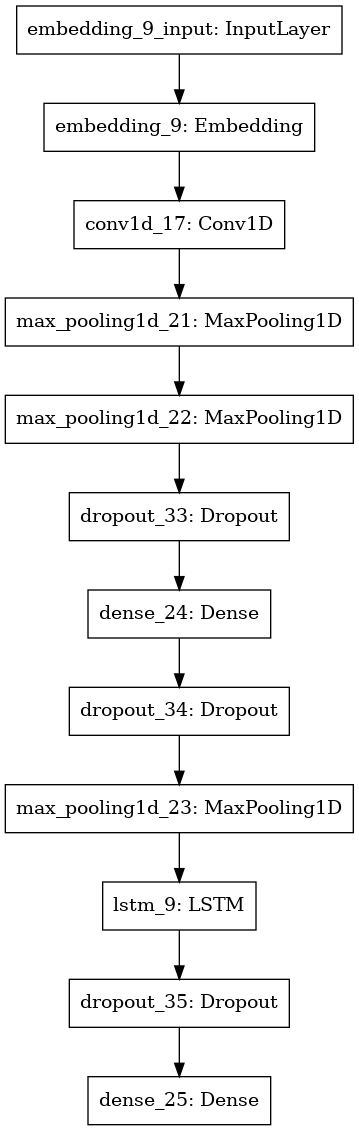

In [477]:
#Plotting model
plot_model(model)

In [478]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/10
11/11 - 4s - loss: 0.6933 - accuracy: 0.5077 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/10
11/11 - 0s - loss: 0.6931 - accuracy: 0.5138 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/10
11/11 - 0s - loss: 0.6935 - accuracy: 0.4615 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 4/10
11/11 - 0s - loss: 0.6935 - accuracy: 0.4462 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 5/10
11/11 - 0s - loss: 0.6934 - accuracy: 0.4831 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 6/10
11/11 - 0s - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/10
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 8/10
11/11 - 0s - loss: 0.6930 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 9/10
11/11 - 0s - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 10/10
11/11 - 0s - loss: 0.6932 - accuracy: 0.5108 - val_loss: 0.6932 - val_accuracy: 0.4985


In [479]:
hist = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/20
11/11 - 0s - loss: 0.6932 - accuracy: 0.5077 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/20
11/11 - 0s - loss: 0.6934 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/20
11/11 - 0s - loss: 0.6931 - accuracy: 0.5108 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/20
11/11 - 0s - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/20
11/11 - 0s - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/20
11/11 - 0s - loss: 0.6933 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 7/20
11/11 - 0s - loss: 0.6938 - accuracy: 0.4277 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 8/20
11/11 - 0s - loss: 0.6935 - accuracy: 0.4892 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 9/20
11/11 - 0s - loss: 0.6929 - accuracy: 0.5231 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 10/20
11/11 - 0s - loss: 0.6930 - accuracy: 0.5323 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/20
11/11 -

In [480]:
hist = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/30
11/11 - 0s - loss: 0.6925 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 2/30
11/11 - 0s - loss: 0.6935 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 3/30
11/11 - 0s - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 4/30
11/11 - 0s - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/30
11/11 - 0s - loss: 0.6935 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/30
11/11 - 0s - loss: 0.6934 - accuracy: 0.4646 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/30
11/11 - 0s - loss: 0.6931 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 8/30
11/11 - 0s - loss: 0.6933 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 9/30
11/11 - 0s - loss: 0.6931 - accuracy: 0.5354 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 10/30
11/11 - 0s - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 11/30
11/11 -

In [481]:
hist = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/40
11/11 - 0s - loss: 0.6928 - accuracy: 0.5138 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/40
11/11 - 0s - loss: 0.6928 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/40
11/11 - 0s - loss: 0.6933 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/40
11/11 - 0s - loss: 0.6933 - accuracy: 0.4831 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/40
11/11 - 0s - loss: 0.6928 - accuracy: 0.5446 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/40
11/11 - 0s - loss: 0.6937 - accuracy: 0.4708 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/40
11/11 - 0s - loss: 0.6947 - accuracy: 0.4646 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 8/40
11/11 - 0s - loss: 0.6936 - accuracy: 0.5231 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 9/40
11/11 - 0s - loss: 0.6935 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 10/40
11/11 - 0s - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/40
11/11 -

In [482]:
hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/50
11/11 - 0s - loss: 0.6932 - accuracy: 0.5077 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 2/50
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 3/50
11/11 - 0s - loss: 0.6935 - accuracy: 0.5046 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 4/50
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 5/50
11/11 - 0s - loss: 0.6935 - accuracy: 0.5077 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 6/50
11/11 - 0s - loss: 0.6929 - accuracy: 0.5077 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 7/50
11/11 - 0s - loss: 0.6934 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 8/50
11/11 - 0s - loss: 0.6938 - accuracy: 0.5077 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 9/50
11/11 - 0s - loss: 0.6936 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 10/50
11/11 - 0s - loss: 0.6927 - accuracy: 0.5108 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/50
11/11 -

In [483]:
hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test), shuffle=True, verbose = 2)

Epoch 1/60
11/11 - 0s - loss: 0.6930 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/60
11/11 - 0s - loss: 0.6930 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/60
11/11 - 0s - loss: 0.6930 - accuracy: 0.5108 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/60
11/11 - 0s - loss: 0.6931 - accuracy: 0.5077 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/60
11/11 - 0s - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/60
11/11 - 0s - loss: 0.6929 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/60
11/11 - 0s - loss: 0.6932 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 8/60
11/11 - 0s - loss: 0.6933 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 9/60
11/11 - 0s - loss: 0.6929 - accuracy: 0.5262 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 10/60
11/11 - 0s - loss: 0.6929 - accuracy: 0.5354 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/60
11/11 -

In [484]:
hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/70
11/11 - 0s - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/70
11/11 - 0s - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/70
11/11 - 0s - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/70
11/11 - 0s - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/70
11/11 - 0s - loss: 0.6930 - accuracy: 0.5323 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 6/70
11/11 - 0s - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 7/70
11/11 - 0s - loss: 0.6930 - accuracy: 0.5415 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 8/70
11/11 - 0s - loss: 0.6931 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 9/70
11/11 - 0s - loss: 0.6934 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 10/70
11/11 - 0s - loss: 0.6931 - accuracy: 0.4831 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 11/70
11/11 -

In [485]:
hist = model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/80
11/11 - 0s - loss: 0.6931 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/80
11/11 - 0s - loss: 0.6931 - accuracy: 0.5169 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/80
11/11 - 0s - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/80
11/11 - 0s - loss: 0.6933 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/80
11/11 - 0s - loss: 0.6931 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/80
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/80
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 8/80
11/11 - 0s - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 9/80
11/11 - 0s - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 10/80
11/11 - 0s - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/80
11/11 -

In [486]:
hist = model.fit(x_train, y_train, epochs=90, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/90
11/11 - 0s - loss: 0.6933 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 2/90
11/11 - 0s - loss: 0.6932 - accuracy: 0.5077 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 3/90
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 4/90
11/11 - 0s - loss: 0.6932 - accuracy: 0.4831 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/90
11/11 - 0s - loss: 0.6930 - accuracy: 0.5323 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/90
11/11 - 0s - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/90
11/11 - 0s - loss: 0.6932 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 8/90
11/11 - 0s - loss: 0.6931 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 9/90
11/11 - 0s - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 10/90
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/90
11/11 -

In [487]:
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/100
11/11 - 0s - loss: 0.6931 - accuracy: 0.4769 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/100
11/11 - 0s - loss: 0.6931 - accuracy: 0.5108 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/100
11/11 - 0s - loss: 0.6934 - accuracy: 0.4862 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/100
11/11 - 0s - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/100
11/11 - 0s - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/100
11/11 - 0s - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 7/100
11/11 - 0s - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 8/100
11/11 - 0s - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 9/100
11/11 - 0s - loss: 0.6930 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 10/100
11/11 - 0s - loss: 0.6934 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 11/

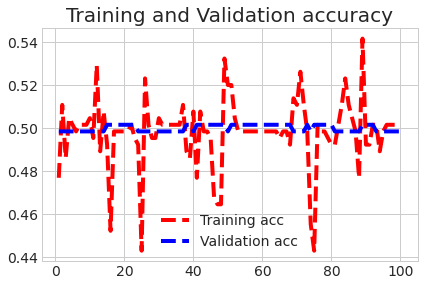

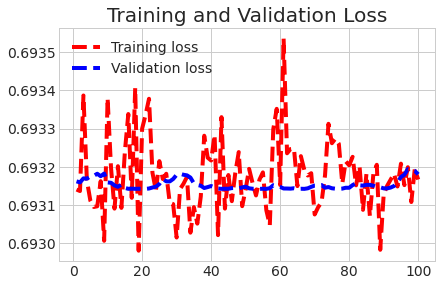

In [488]:
#Plot training validation accuracy and loss
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.style.use(['seaborn-whitegrid'])
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'b'])
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [489]:
# Akurasi model
accuracy = model.evaluate(x_test, y_test)
print("Accuracy of the model is: ", accuracy)

11/11 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4985
Accuracy of the model is:  [0.6931805610656738, 0.4984615445137024]


In [490]:
#Evaluasi
print("Model Performance of CNN (Test Accuracy)")
print('Accuracy: {:0.2f}%\nLoss: {:0.2f}%\n'.format(accuracy[1]*100, accuracy[0]))

Model Performance of CNN (Test Accuracy)
Accuracy: 49.85%
Loss: 0.69%

